# G4 Confidencialidade Atual

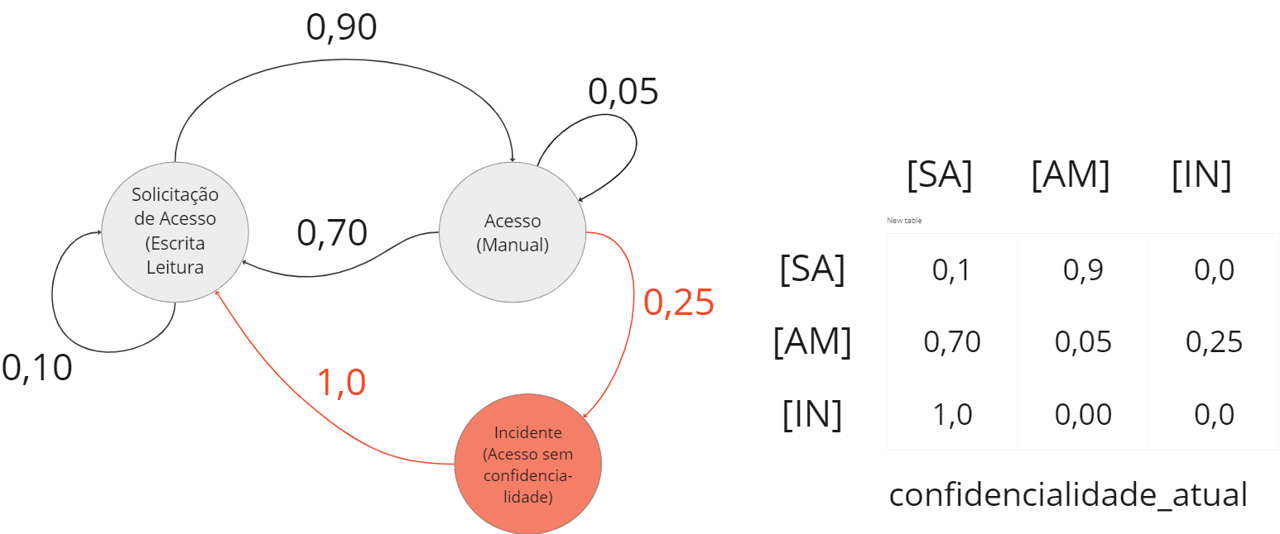

In [ ]:
import numpy as np
import random as rm
import datetime

# The statespace
states = ["SolicitacaoAcesso","AcessoManual","IncidenteAcessoSemConfidencialidade"]



# Possible sequences of events
transitionName = [["SASA", "SAAM", "SAIN"],["AMSA", "AMAM", "AMIN"],["INSA", "INAM", "ININ"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.10, 0.90, 0.00], [0.70, 0.05, 0.25], [1.00, 0.00, 0.00]]

if (sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[2])) != 3:
    print("Detectado um erro - talvez na matriz de probabilidades?")
else: print("Tudo certo. Vamos em frente. ", (datetime.datetime.now()+datetime.timedelta(hours=-3)), "!!")

Tudo certo. Vamos em frente.  2024-11-06 17:29:12.726917 !!



 G4: Simulação com Markov para Sistema Atual - Sem controle automatizado de Confidencialidade  [ 2024-11-06 17:58:37.292519 ]
     >> Simulação quantidade de dias =  180
     >> Numero de acessos por dia    =  210



1. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "SolicitacaoAcesso" é de ......................: 62.83 %
2. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "AcessoManual" é de ...........................: 16.59 %
3. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "IncidenteAcessoSemConfidencialidade" é de ....: 20.57 %




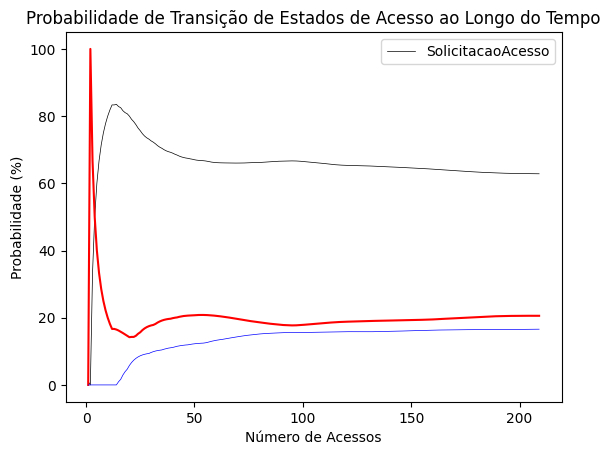

In [ ]:
import numpy as np
import random as rm
import datetime
import matplotlib.pyplot as plt

from types import EllipsisType
def activity_forecast(actions):
    # Choose the starting state
    activityAction = "SolicitacaoAcesso"
    activityList = [activityAction]
    i = 0
    prob = 1

    while i != actions:
        #Estado - Solicitação Acesso (["SASA", "SAAM", "SAIN"] => [0.10, 0.90, 0.00])
        #print ("estado = ", activityAction)

        if activityAction == "SolicitacaoAcesso":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SASA":
                prob = prob * 0.10
                activityAction = "SolicitacaoAcesso"
                activityList.append("SolicitacaoAcesso")
                pass
            elif change == "SAAM":
                prob = prob * 0.90
                activityAction = "AcessoManual"
                activityList.append("AcessoManual")
            else:
                prob = prob * 0.0
                activityAction = "IncidenteAcessoSemConfidencialidade"
                activityList.append("IncidenteAcessoSemConfidencialidade")

        #Estado - Acesso Manual (["AMSA", "AMAM", "AMIN"] => [0.80, 0.05, 0.15])
        elif activityAction == "AcessoManual":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "AMSA":
                prob = prob * 0.70
                activityAction = "SolicitacaoAcesso"
                activityList.append("SolicitacaoAcesso")
                pass
            elif change == "AMAM":
                prob = prob * 0.05
                activityAction = "AcessoManual"
                activityList.append("AcessoManual")
            elif change == "AMIN":
                prob = prob * 0.25
                activityAction = "IncidenteAcessoSemConfidencialidade"
                activityList.append("IncidenteAcessoSemConfidencialidade")

        #Estado - IncidenteAcessoSemConfidencialidade (["INSA", "INAM", "ININ"] => [1.00, 0.00, 0.0])
        elif activityAction == "IncidenteAcessoSemConfidencialidade":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "INSA":
                prob = prob * 1.00
                activityAction = "SolicitacaoAcesso"
                activityList.append("SolicitacaoAcesso")
                pass
            elif change == "INAM":
                prob = prob * 0.00
                activityAction = "AcessoManual"
                activityList.append("AcessoManual")
            elif change == "ININ":
                prob = prob * 0.00
                activityAction = "IncidenteAcessoSemConfidencialidade"
                activityList.append("IncidenteAcessoSemConfidencialidade")
        i += 1

    return activityList

# To save every activityList
list_activity = []
countSA = 0
countAM = 0
countIN = 0

#Vetores de probabilidades e eixo X
eixoX = []
probSolicitacaoAcesso = []
probAcessoManual = []
probIncidentesAcessoSemConfidencialidade = []

probSolicitacaoAcesso.append (1.0)
probAcessoManual.append (0.0)
probIncidentesAcessoSemConfidencialidade.append (0.0)

# Experimente Número de dias (Dias estimado/previsao - forecast) e de Acessos (Nactions)
Nactions = 210 # Cada dia dos 180 dias (210 acessos (35 pessoas, 6 acessos))
Ndias = 180  # Estimativa em dias (forecast)
# `Range` starts from the first count up until but excluding the last count

#para cálculo de probabilidade em cada predição (acumulado)
totalSimuladoPredicao = 0

iteracao = 1
for index in range(1, Nactions):
   eixoX.append(index)

print ("=============================================================================================================================================")
print ()
print (" G4: Simulação com Markov para Sistema Atual - Sem controle automatizado de Confidencialidade  [", (datetime.datetime.now()+datetime.timedelta(hours=-3)), "]")
print ("     >> Simulação quantidade de dias = ", Ndias)
print ("     >> Numero de acessos por dia    = ", Nactions)
print ()
print ()
print ("=============================================================================================================================================")
print ()

list_activity = []
for iteractions in range(1, Nactions):
    list_activity.append(activity_forecast(Ndias)) # Estimar Ndias


    # **** Cálculo do estado estável para este acesso do Nactions e com predição de Ndias forecast()
    #
    # Iterate through the list to get a count of all activities ending in state:'ServicoPrincipal'
    #print (">>", list_activity)
    for smaller_list in list_activity:
        #print ("   +", smaller_list)
        if(smaller_list[2] == "SolicitacaoAcesso"):
            countSA += 1
    #print ("countSA", countSA, totalSimuladoPredicao)



    # Iterate through the list to get a count of all activities ending in state:'AcessoManual'
    for smaller_list in list_activity:
        if(smaller_list[2] == "AcessoManual"):
            countAM += 1
    #print ("countAM", countAM, totalSimuladoPredicao)



    # Iterate through the list to get a count of all activities ending in state:'IncidenteAcessoSemConfidencialidade'
    for smaller_list in list_activity:
        if(smaller_list[2] == "IncidenteAcessoSemConfidencialidade"):
            countIN += 1
    #print ("countIN", countIN, totalSimuladoPredicao)
    #print ("Calculando ...", countSA, countAM, countIN)
    totalSimuladoPredicao = countSA + countAM + countIN

    # Calculate the probability of starting from state:'Sleep' and ending at state:'ServicoPrincipal'
    probSolicitacaoAcesso.append((countSA/totalSimuladoPredicao)*100.0)
    #print("1. The probability of starting at state:'SolicitacaoAcesso' and ending at state:'SolicitacaoAcesso'= " + str(probSolicitacaoAcesso[iteracao]) + "%")

    # Calculate the probability of starting from state:'SolicitacaoAcesso' and ending at state:'AcessoManual'
    probAcessoManual.append((countAM/totalSimuladoPredicao)*100.0)
    #print("2. The probability of starting at state:'SolicitacaoAcesso' and ending at state:'AcessoManual'= " + str(probAcessoManual[iteracao]) + "%")


    # Calculate the probability of starting from state:'SolicitacaoAcesso' and ending at state:'Incidente'
    probIncidentesAcessoSemConfidencialidade.append((countIN/totalSimuladoPredicao)*100.0)
    #print("3. The probability of starting at state:'SolicitacaoAcesso' and ending at state:'IncidenteAcessoSemConfidencialidade'= " + str(probIncidentesAcessoSemConfidencialidade[iteracao]) + "%")

    #
    # **** Fim cálculo  ****

    iteracao +=1

print(f'1. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "SolicitacaoAcesso" é de ......................: {probSolicitacaoAcesso[Nactions-1]:.2f} %')
print(f'2. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "AcessoManual" é de ...........................: {probAcessoManual[Nactions-1]:.2f} %')
print(f'3. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "IncidenteAcessoSemConfidencialidade" é de ....: {probIncidentesAcessoSemConfidencialidade[Nactions-1]:.2f} %')
print ()
print ()
plt.plot(eixoX[:Nactions-1], probSolicitacaoAcesso[:Nactions-1], color = 'black', linewidth = 0.5, label='SolicitacaoAcesso')
plt.plot(eixoX[:Nactions-1], probIncidentesAcessoSemConfidencialidade[:Nactions-1], color='red')
plt.plot(eixoX[:Nactions-1], probAcessoManual[:Nactions-1], color='blue', linewidth = 0.5)

# Configurações do gráfico
plt.title("Probabilidade de Transição de Estados de Acesso ao Longo do Tempo")
plt.xlabel("Número de Acessos")
plt.ylabel("Probabilidade (%)")
plt.legend()  # Adiciona a legenda
plt.show()

# Conclusão e análise dos resultados

Com base na simulação de 180 dias, em que o sistema experimentou uma média de 210 acessos por dia, vamos analisar os resultados do modelo de Cadeia de Markov para entender os pontos de força e os riscos associados ao sistema atual.

# Análise e Conclusão
1. Solicitação de Acesso Não Concluída (63.92%): A probabilidade de o sistema iniciar e encerrar no estado "SolicitacaoAcesso" é de 63.92%, o que significa que mais da metade dos acessos termina sem chegar a um resultado final, permanecendo em uma solicitação pendente. Esse índice elevado sugere que o sistema atual enfrenta limitações em processar as requisições de acesso de forma eficiente, impactando o fluxo de operação. Essa situação pode ser atribuída à falta de um mecanismo automatizado de controle de acesso ou atrasos no processo de aprovação, evidenciando que o sistema atual não está completamente interoperável para tratar solicitações de forma rápida e eficaz.

2. Acessos Manuais (12.80%): Com uma probabilidade de 12.80% de um acesso manual ser concedido, percebe-se que uma parte das solicitações consegue progredir, mas é insuficiente para atender ao volume de acessos de forma robusta. Essa baixa porcentagem reflete uma limitação em depender de processos manuais, o que não apenas desacelera o fluxo, mas também aumenta o tempo de resposta e reduz a capacidade de processamento do sistema.

3. Incidentes de Acesso Não Autorizado (23.28%): A probabilidade de um incidente de acesso ocorrer sem as devidas permissões de confidencialidade é de 23.28%. Isso representa um risco significativo, indicando que quase um quarto dos acessos termina em um estado de "IncidenteAcessoSemConfidencialidade". Esse valor sugere que documentos confidenciais ou dados sensíveis podem estar sendo acessados por dispositivos ou usuários não autorizados. Esse índice de incidentes demonstra uma falha crítica na segurança e na integridade dos dados e, provavelmente, é uma consequência da falta de controle automatizado de confidencialidade.

# Conclusão Final
O resultado desta simulação demonstra que o sistema atual enfrenta desafios tanto em eficiência quanto em segurança. A alta probabilidade de solicitações não concluídas e incidentes de acesso sem autorização expõem fragilidades na interoperabilidade e na proteção de dados. Para mitigar esses problemas, é recomendável a implementação de um controle automatizado de confidencialidade. Esse controle automatizado poderia ajudar a melhorar o processamento das solicitações de acesso, reduzir a dependência de processos manuais e, principalmente, proteger os dados contra acessos não autorizados.

Esses resultados indicam uma necessidade urgente de aprimoramento no fluxo de controle de acesso para que o sistema seja mais ágil e seguro, atendendo melhor aos requisitos de confidencialidade e integridade da informação.